# Wykorzystanie biblioteki DEAP w problemie optymalizacji parametrów klasyfikatorów oraz selekcji cech

### I Optymalizacja parametrów klasyfikatorów

In [10]:
# loading data
import pandas as pd
pd.set_option('display.max_columns', None)
df=pd.read_csv("ReplicatedAcousticFeatures-ParkinsonDatabase.csv",sep=',')

df.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,0.019660,0.021882,59.437966,60.736249,71.882864,77.626729,77.538042,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,0.014097,0.016828,59.838895,62.655599,74.378669,79.989228,80.269783,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,0.012683,0.013038,57.293808,61.858336,73.665297,78.930502,79.033510,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,0.015696,0.018330,62.179573,68.678205,79.839984,84.367682,84.252430,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,0.008385,0.011037,67.534024,74.976858,85.727420,91.033967,91.145189,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [11]:
# Preprocessing
y=df['Status']
df.drop('Status',axis=1,inplace=True)

df.drop('ID',axis=1,inplace=True)
df.drop('Recording',axis=1,inplace=True)

numberOfAtributtes= len(df.columns)
print(numberOfAtributtes)

45


In [12]:
# Classification using SVC with default parameters and 5x K-fold cross validation for all 45 features
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

mms = MinMaxScaler()
df_norm = mms.fit_transform(df)

clf = SVC()
scores = model_selection.cross_val_score(clf, df_norm, y, cv=5, scoring='accuracy', n_jobs=-1)
print(scores.mean())

0.8


In [13]:
# Generationg new individual
import random
def parametersSVC(numberFeatures,icls):
    genome = list()

    #kernel
    listKernel = ["linear","rbf", "poly","sigmoid"]
    genome.append(listKernel[random.randint(0, 3)])

    #c
    k = random.uniform(0.1, 100)
    genome.append(k)

    #degree
    genome.append(random.uniform(0.1,5))

    #gamma
    gamma = random.uniform(0.001,5)
    genome.append(gamma)

    # coeff
    coeff = random.uniform(0.01, 10)
    genome.append(coeff)

    return icls(genome)

In [14]:
# Fitness function
import math
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

def parametersFitnessSVC(y,df,numberOfAtributtes,individual):
    split=5
    cv = StratifiedKFold(n_splits=split)
    mms = MinMaxScaler()
    df_norm = mms.fit_transform(df)

    estimator = SVC(kernel=individual[0],C=individual[1],degree=individual[2],
                    gamma=individual[3],coef0=individual[4],random_state=101)
    resultSum = 0
    for train, test in cv.split(df_norm, y):
        estimator.fit(df_norm[train], y[train])
        predicted = estimator.predict(df_norm[test])
        expected = y[test]
        tn, fp, fn, tp = metrics.confusion_matrix(expected, predicted).ravel()
        result = (tp + tn) / (tp + fp + tn + fn) #w oparciu o macierze pomyłek https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
        resultSum = resultSum + result #zbieramy wyniki z poszczególnych etapów walidacji krzyżowej

    return resultSum / split,

In [15]:
# Mutation
def mutationSVC(individual):
    numberParamer= random.randint(0,len(individual)-1)
    if numberParamer==0:
        # kernel
        listKernel = ["linear", "rbf", "poly", "sigmoid"]
        individual[0]=listKernel[random.randint(0, 3)]
    elif numberParamer==1:
        #C
        k = random.uniform(0.1,100)
        individual[1]=k
    elif numberParamer == 2:
        #degree
        individual[2]=random.uniform(0.1, 5)
    elif numberParamer == 3:
        #gamma
        gamma = random.uniform(0.01, 5)
        individual[3]=gamma
    elif numberParamer ==4:
        # coeff
        coeff = random.uniform(0.1, 20)
        individual[2] = coeff

In [16]:
from deap import base, creator, tools
import random
from math import sin
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [17]:
sizePopulation = 100
probabilityMutation = 0.2
probabilityCrossover = 0.8
numberIteration = 100
numberElitism = 1

In [18]:
def configureDeap(fitness, parameters, mutation,
                  selection_param={'function':tools.selTournament, 'tournsize':3},
                 mate_params={'function':tools.cxTwoPoint},):
    
    creator.create('FitnessMax', base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox() 
    toolbox.register('individual', parameters, numberOfAtributtes, creator.Individual)
    toolbox.register('evaluate', fitness,y,df,numberOfAtributtes)
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    toolbox.register('select', **selection_param)
    toolbox.register('mate', **mate_params)
    toolbox.register('mutate', mutation)

    return toolbox

In [19]:
def mutate(toolbox, offspring):
    for mutant in offspring:
        # mutation
        if random.random() < probabilityMutation:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    return offspring

In [20]:
def setIndividualFitnessValue(individuals, fitnesses):
    for ind, fit in zip(individuals, fitnesses):
        ind.fitness.value = [fit]
    return individuals

In [21]:
def initPopulation(toolbox):
    population = toolbox.population(n=100)
    fitnesses = list(map(toolbox.evaluate, population))
    population = setIndividualFitnessValue(population, fitnesses)
    return population

In [22]:
def crossover(toolbox, offspring):
    # [::2] - gets only individuals with odd indexes
    # [1::2] -  gets only individuals with even indexes
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        # crossover
        if random.random() < probabilityCrossover:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    return offspring

In [23]:
def evaluate(toolbox, offspring, verbose=0):
    # evaluate new individuals
    new_individuals = [ind for ind in offspring if not ind.fitness.valid]
    new_fitnesses = map(toolbox.evaluate, new_individuals)
    for ind, fit in zip(new_individuals, new_fitnesses):
        ind.fitness.values = fit
    
    if verbose>3:
        print('Ewaluated %i individuals'%len(new_individuals))
    return offspring

In [24]:
def getBestsForElitism(population):
    listElitism = []
    for x in range(0, numberElitism):
        listElitism.append(tools.selBest(population, 1)[0])
    return listElitism

In [25]:
def calculateStatistics(population,verbose=0):
    fits = [ind.fitness.values[0] for ind in population]
    length = len(population)
    mean = sum(fits)/length
    sum2 = sum(x*x for x in fits)
    std = abs(sum2/length-mean **2)**0.5
    if verbose>2:
        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)
    return (mean, std)

In [26]:
def pickBestIndividual(population, verbose=0):
    best_ind = tools.selBest(population, 1)[0]
    if verbose>1:
        print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    return best_ind

In [27]:
def plotSimple(y_vals=[], label_y='y', label_x='x', title='plot', instance_info='no_info', save_location='./plots/'):
    filename = save_location + title+'_'+ instance_info +'.png'
    x_vals = [x for x in range(len(y_vals))]
    plt.plot(x_vals, y_vals)
    plt.title(title)
    plt.ylabel(label_y)
    plt.xlabel(label_x)
#     plt.savefig(filename)
    plt.show()
    plt.close()

In [28]:
def plotResults(stats):
    plotSimple([best[0].fitness.values[0] for best in stats], 'best', 'epoch', 'fitness(iteration)')
    plotSimple([best[1] for best in stats], 'mean', 'epoch', 'mean(iteration)')
    plotSimple([best[2] for best in stats], 'std', 'epoch', 'std(iteration)')
    plotSimple([best[3] for best in stats], 'duration', 'epoch', 'epoch_duration(iteration)')

In [29]:
def startOptimizationLoop(toolbox, population, elitism=False, verbose=0):
    stats = []
    g = 0
    while g < numberIteration:
        g = g + 1
        if verbose>0:
            print('-- Generation %i --' % g)
        start = timer()  
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        
        elite = getBestsForElitism(offspring) if elitism else []
        
        offspring = crossover(toolbox, offspring)
        offspring = mutate(toolbox, offspring)
        offspring = evaluate(toolbox, offspring)
        duration = timer()-start
        
        population[:] = offspring + elite

        mean, std = calculateStatistics(population, verbose)
        best_ind = pickBestIndividual(population, verbose)
        stats.append((best_ind, mean, std, duration))
    
    if verbose>-1:
        best_overall = pickBestIndividual(population, verbose)
        print('Best found individual: (x1,x2) =', best_overall, ', y =', best_overall.fitness.values[0])
    return stats

In [30]:
def run(fitness, parameters, mutation, selection, mate, elitism, verbose):
    toolbox = configureDeap(fitness, parameters, mutation, selection, mate)
    population = initPopulation(toolbox)
    stats = startOptimizationLoop(toolbox, population, elitism, verbose)
    plotResults(stats)

-- Generation 1 --
  Min 0.3
  Max 0.7625000000000001
  Avg 0.6525416666666668
  Std 0.13975163361199686
Best individual is ['linear', 92.2719277801278, 3.2766012755869554, 3.445699332722079, 8.965806714814347], (0.7625000000000001,)
-- Generation 2 --
  Min 0.30833333333333335
  Max 0.7875
  Avg 0.7174583333333335
  Std 0.08706976568948599
Best individual is ['poly', 8.911305441939547, 3.8216191042540557, 0.0518463557901189, 0.38631412625649697], (0.7875,)
-- Generation 3 --
  Min 0.6916666666666667
  Max 0.7875
  Avg 0.7539166666666669
  Std 0.0169232335365716
Best individual is ['poly', 8.911305441939547, 3.8216191042540557, 0.0518463557901189, 0.38631412625649697], (0.7875,)
-- Generation 4 --
  Min 0.4416666666666666
  Max 0.8166666666666668
  Avg 0.7567500000000004
  Std 0.035948361885101296
Best individual is ['rbf', 6.856491109010819, 4.714689488936667, 0.0518463557901189, 0.38631412625649697], (0.8166666666666668,)
-- Generation 5 --
  Min 0.7
  Max 0.7875
  Avg 0.762750000000

  Min 0.5
  Max 0.8291666666666668
  Avg 0.8170833333333327
  Std 0.04454827281851392
Best individual is ['rbf', 3.71999208869868, 1.300682672101211, 0.0518463557901189, 9.381449990101025], (0.8291666666666668,)
-- Generation 37 --
  Min 0.5708333333333333
  Max 0.8291666666666668
  Avg 0.8226666666666661
  Std 0.0294174929062697
Best individual is ['rbf', 3.71999208869868, 2.246895704124002, 0.0518463557901189, 9.381449990101025], (0.8291666666666668,)
-- Generation 38 --
  Min 0.5
  Max 0.8291666666666668
  Avg 0.817416666666666
  Std 0.049160945994893956
Best individual is ['rbf', 3.71999208869868, 3.340622743469903, 0.0518463557901189, 2.6553342650368896], (0.8291666666666668,)
-- Generation 39 --
  Min 0.5
  Max 0.8291666666666668
  Avg 0.8195416666666661
  Std 0.03755872716310723
Best individual is ['rbf', 3.71999208869868, 0.2867786169121399, 0.0518463557901189, 2.6553342650368896], (0.8291666666666668,)
-- Generation 40 --
  Min 0.5708333333333333
  Max 0.8291666666666668
  Avg

  Min 0.7125
  Max 0.8291666666666668
  Avg 0.8213333333333328
  Std 0.024017354836342885
Best individual is ['rbf', 3.71999208869868, 14.399439819062966, 0.0518463557901189, 2.6553342650368896], (0.8291666666666668,)
-- Generation 71 --
  Min 0.7375
  Max 0.8291666666666668
  Avg 0.8246666666666661
  Std 0.01796679035212138
Best individual is ['rbf', 3.71999208869868, 3.8848463147168095, 0.0518463557901189, 2.6553342650368896], (0.8291666666666668,)
-- Generation 72 --
  Min 0.5708333333333333
  Max 0.8291666666666668
  Avg 0.8208749999999994
  Std 0.038394403346516254
Best individual is ['rbf', 3.71999208869868, 8.495130153859252, 0.0518463557901189, 2.6553342650368896], (0.8291666666666668,)
-- Generation 73 --
  Min 0.5
  Max 0.8291666666666668
  Avg 0.8138333333333331
  Std 0.05177367949924096
Best individual is ['rbf', 3.71999208869868, 1.3730666133368092, 0.0518463557901189, 2.6553342650368896], (0.8291666666666668,)
-- Generation 74 --
  Min 0.5708333333333333
  Max 0.829166666

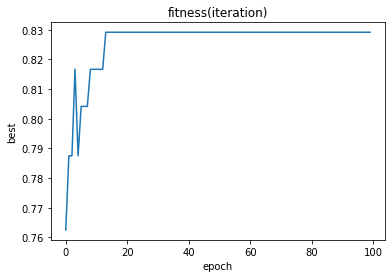

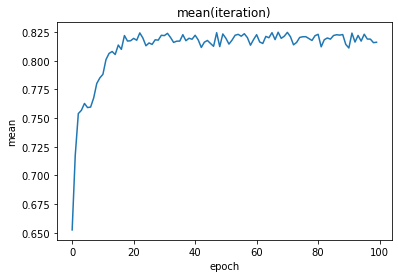

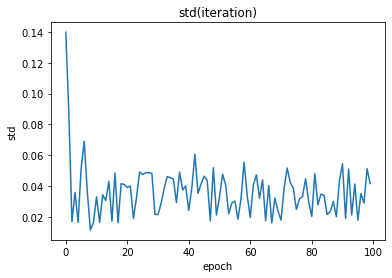

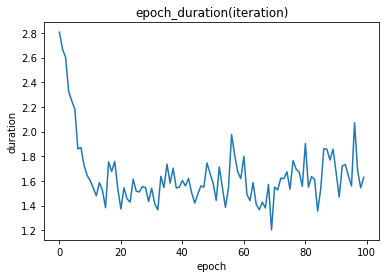

In [31]:
# scenario 0 (tournament, cxTwoPoint, with elitism):
selection={'function':tools.selTournament, 'tournsize':3} 
mate={'function':tools.cxTwoPoint}

parameters=parametersSVC
fitness=parametersFitnessSVC
mutation=mutationSVC
elitism = False
verbose = 7
run(fitness, parameters, mutation, selection , mate , elitism, verbose)

In [ ]:
ind = ['poly', 0.3690320297276768, 1.9084110197644817, 0.1053757953826651, 8.515094980694283]
print(SVCParametersFitness(y,df,numberOfAtributtes,ind))


### II Selekcja cech

In [36]:
# Generationg new individual
import random
def parametersFeaturesSVC(numberFeatures,icls):
    genome = list()

    #kernel
    listKernel = ["linear","rbf", "poly","sigmoid"]
    genome.append(listKernel[random.randint(0, 3)])

    #c
    k = random.uniform(0.1, 100)
    genome.append(k)

    #degree
    genome.append(random.uniform(0.1,5))

    #gamma
    gamma = random.uniform(0.001,5)
    genome.append(gamma)

    # coeff
    coeff = random.uniform(0.01, 10)
    genome.append(coeff)

    for i in range(0,numberFeatures):
        genome.append(random.randint(0, 1))
    
    return icls(genome)

In [40]:
def parametersFitnessFeaturesSVC(y,df,numberOfAtributtes,individual):
    split=5
    cv = StratifiedKFold(n_splits=split)
    
    listColumnsToDrop=[] #lista cech do usuniecia
    for i in range(numberOfAtributtes,len(individual)):
            if individual[i]==0: #gdy atrybut ma zero to usuwamy cechę
                listColumnsToDrop.append(i-numberOfAtributtes)

    dfSelectedFeatures=df.drop(df.columns[listColumnsToDrop], axis=1, inplace=False)
    
    mms = MinMaxScaler()
    df_norm = mms.fit_transform(dfSelectedFeatures)
    estimator = SVC(kernel=individual[0],C=individual[1],degree=individual[2],gamma=individual[3],coef0=individual[4],random_state=101)
    resultSum = 0
    for train, test in cv.split(df_norm, y):
        estimator.fit(df_norm[train], y[train])
        predicted = estimator.predict(df_norm[test])
        expected = y[test]
        tn, fp, fn, tp = metrics.confusion_matrix(expected, predicted).ravel()
        result = (tp + tn) / (tp + fp + tn + fn) #w oparciu o macierze pomyłek https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
        resultSum = resultSum + result #zbieramy wyniki z poszczególnych etapów walidacji krzyżowej

    return resultSum / split,

In [41]:
def mutationFeaturesSVC(individual):
    numberParamer= random.randint(0,len(individual)-1)
    if numberParamer==0:
        # kernel
        listKernel = ["linear", "rbf", "poly", "sigmoid"]
        individual[0]=listKernel[random.randint(0, 3)]
    elif numberParamer==1:
        #C
        k = random.uniform(0.1,100)
        individual[1]=k
    elif numberParamer == 2:
        #degree
        individual[2]=random.uniform(0.1, 5)
    elif numberParamer == 3:
        #gamma
        gamma = random.uniform(0.01, 1)
        individual[3]=gamma
    elif numberParamer ==4:
        # coeff
        coeff = random.uniform(0.1, 1)
        individual[2] = coeff
    else: #genetyczna selekcja cech
        if individual[numberParamer] == 0: 
            individual[numberParamer] = 1
        else:
            individual[numberParamer] = 0


C:\Users\dtms\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\dtms\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


-- Generation 1 --
  Min 0.24166666666666664
  Max 0.7708333333333333
  Avg 0.6643333333333331
  Std 0.13427314615282543
Best individual is ['rbf', 43.235746102361034, 1.9631981561686591, 3.11380356368254, 4.320026601215837, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1], (0.7708333333333333,)
-- Generation 2 --
  Min 0.3375
  Max 0.7708333333333333
  Avg 0.7422083333333329
  Std 0.0455165377454652
Best individual is ['rbf', 43.235746102361034, 1.9631981561686591, 3.11380356368254, 4.320026601215837, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1], (0.7708333333333333,)
-- Generation 3 --
  Min 0.7208333333333333
  Max 0.7708333333333333
  Avg 0.7591250000000003
  Std 0.01151229716916462
Best individual is ['linear', 11.936393212592636, 4.2335642870523875, 4.441412376453505, 4.179303620735881, 0, 0, 1, 1, 1, 1, 0,

  Min 0.725
  Max 0.8291666666666668
  Avg 0.8240833333333346
  Std 0.010147865128407652
Best individual is ['rbf', 0.9947201231752432, 4.2335642870523875, 0.18725982060478852, 0.044512866937287246, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], (0.8291666666666668,)
-- Generation 25 --
  Min 0.8083333333333332
  Max 0.8291666666666668
  Avg 0.8254166666666678
  Std 0.0022438186691488425
Best individual is ['rbf', 0.9947201231752432, 4.2335642870523875, 0.18725982060478852, 0.044512866937287246, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], (0.8291666666666668,)
-- Generation 26 --
  Min 0.8083333333333332
  Max 0.8333333333333334
  Avg 0.8262083333333341
  Std 0.003189337705346267
Best individual is ['rbf', 0.9947201231752432, 4.2335642870523875, 0.18725982060478852, 0.044512866937287246, 1, 0, 0, 0, 0, 0, 0,

  Min 0.8291666666666668
  Max 0.8333333333333334
  Avg 0.8332499999999996
  Std 0.0005833333330093144
Best individual is ['rbf', 0.9947201231752432, 0.51492751232777, 0.18725982060478852, 0.044512866937287246, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1], (0.8333333333333334,)
-- Generation 47 --
  Min 0.8166666666666667
  Max 0.8333333333333334
  Avg 0.833083333333333
  Std 0.0017499999998526802
Best individual is ['rbf', 0.9947201231752432, 0.51492751232777, 0.18725982060478852, 4.179303620735881, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1], (0.8333333333333334,)
-- Generation 48 --
  Min 0.8166666666666667
  Max 0.8333333333333334
  Avg 0.8331666666666664
  Std 0.0016583123949588528
Best individual is ['rbf', 0.9947201231752432, 3.226378245761894, 0.18725982060478852, 4.179303620735881, 0, 0, 1, 0, 1, 1,

  Min 0.7333333333333333
  Max 0.8333333333333334
  Avg 0.8321249999999997
  Std 0.010074290021829075
Best individual is ['rbf', 0.9947201231752432, 0.51492751232777, 0.18725982060478852, 0.044512866937287246, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1], (0.8333333333333334,)
-- Generation 69 --
  Min 0.8083333333333332
  Max 0.8333333333333334
  Avg 0.8329999999999995
  Std 0.002546784464942115
Best individual is ['rbf', 0.9947201231752432, 2.182922459839399, 0.18725982060478852, 0.044512866937287246, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1], (0.8333333333333334,)
-- Generation 70 --
  Min 0.25000000000000006
  Max 0.8333333333333334
  Avg 0.8260833333333332
  Std 0.058886130700599275
Best individual is ['rbf', 0.9947201231752432, 0.51492751232777, 0.18725982060478852, 0.044512866937287246, 0, 0, 1, 0, 

  Min 0.8333333333333334
  Max 0.8333333333333334
  Avg 0.833333333333333
  Std 2.5809568279517847e-08
Best individual is ['rbf', 0.9947201231752432, 3.784235484927105, 0.18725982060478852, 0.044512866937287246, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1], (0.8333333333333334,)
-- Generation 91 --
  Min 0.7291666666666666
  Max 0.8333333333333334
  Avg 0.832083333333333
  Std 0.01054915741761685
Best individual is ['rbf', 0.9947201231752432, 0.9579486961781919, 0.18725982060478852, 0.044512866937287246, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], (0.8333333333333334,)
-- Generation 92 --
  Min 0.8083333333333332
  Max 0.8333333333333334
  Avg 0.8327499999999998
  Std 0.003228561771186384
Best individual is ['rbf', 0.9947201231752432, 0.9579486961781919, 0.18725982060478852, 0.044512866937287246, 0, 0, 0, 0

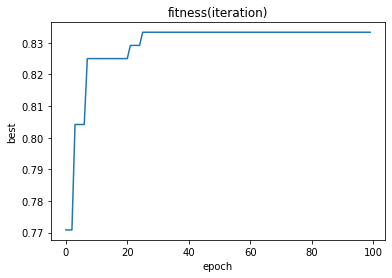

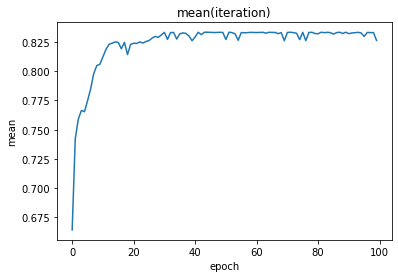

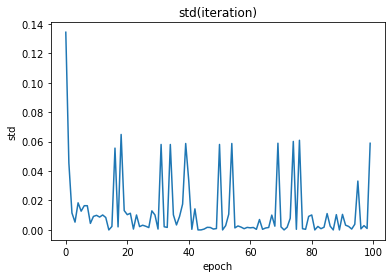

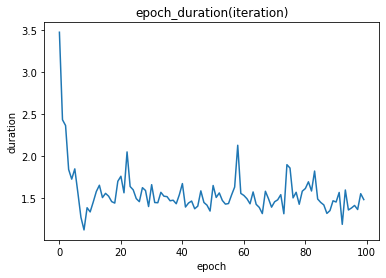

In [43]:
# scenario 0 (tournament, cxTwoPoint, with elitism, 100 epochs, 100 individuals in initpopulation):
selection={'function':tools.selTournament, 'tournsize':3} 
mate={'function':tools.cxTwoPoint}

parameters=parametersFeaturesSVC
fitness=parametersFitnessFeaturesSVC
mutation=mutationFeaturesSVC
elitism = False
verbose = 7
run(fitness, parameters, mutation, selection , mate , elitism, verbose)